In [1]:
import pandas as pd


In [2]:
def load_training_data():
    df = pd.read_csv('numerai_training_data.csv')
    return df

def load_tournament_data():
    df = pd.read_csv('numerai_tournament_data.csv')
    return df
    
def load_ticker_data():
    tickers = pd.read_csv('latest.csv')
    return tickers


In [3]:
df = load_tournament_data()

In [4]:
df.columns

Index(['id', 'era', 'data_type', 'feature_intelligence1',
       'feature_intelligence2', 'feature_intelligence3',
       'feature_intelligence4', 'feature_intelligence5',
       'feature_intelligence6', 'feature_intelligence7',
       ...
       'feature_wisdom38', 'feature_wisdom39', 'feature_wisdom40',
       'feature_wisdom41', 'feature_wisdom42', 'feature_wisdom43',
       'feature_wisdom44', 'feature_wisdom45', 'feature_wisdom46', 'target'],
      dtype='object', length=314)

# See what the targets are for the tournment data.

In [5]:
df['target'].value_counts()


0.50    68954
0.75    27533
0.25    27531
1.00     6882
0.00     6879
Name: target, dtype: int64

In [6]:
df.isna().sum() # it looks like you have 1,522,723 Nan values for the targets.

#There are ~120,000 validation vectors that are stored in the dataset. They have values assoicated with them. You use them to test the CORR of your models. 

# that means there are ~1,500,000 real world vectors that your model will be tested on.

id                             0
era                            0
data_type                      0
feature_intelligence1          0
feature_intelligence2          0
                          ...   
feature_wisdom43               0
feature_wisdom44               0
feature_wisdom45               0
feature_wisdom46               0
target                   1522723
Length: 314, dtype: int64

In [7]:
df.count() # this takes to long

id                       1660502
era                      1660502
data_type                1660502
feature_intelligence1    1660502
feature_intelligence2    1660502
                          ...   
feature_wisdom43         1660502
feature_wisdom44         1660502
feature_wisdom45         1660502
feature_wisdom46         1660502
target                    137779
Length: 314, dtype: int64

## There are 501808 unique ids in the training data.

This means that they do not uniquely refer to a stock. You cannot take the id and use it to determine what stock it is. 

In [8]:
df.era.unique() 
# in this instance of the training data there are 120 eras
# For each era there are the same features
# different eras have differnt readid in them. The number of these ids varies by era usally between 2k and 4.5k unique ids in the training data
# you cannot take a vector of a stock from one era and use it to predict the vector of a target in a different era.



array(['era121', 'era122', 'era123', 'era124', 'era125', 'era126',
       'era127', 'era128', 'era129', 'era130', 'era131', 'era132',
       'era575', 'era576', 'era577', 'era578', 'era579', 'era580',
       'era581', 'era582', 'era583', 'era584', 'era585', 'era586',
       'era587', 'era588', 'era589', 'era590', 'era591', 'era592',
       'era593', 'era594', 'era595', 'era596', 'era597', 'era598',
       'era599', 'era600', 'era601', 'era602', 'era603', 'era604',
       'era605', 'era606', 'era607', 'era608', 'era609', 'era610',
       'era611', 'era612', 'era613', 'era614', 'era615', 'era616',
       'era617', 'era618', 'era619', 'era620', 'era621', 'era622',
       'era623', 'era624', 'era625', 'era626', 'era627', 'era628',
       'era629', 'era630', 'era631', 'era632', 'era633', 'era634',
       'era635', 'era636', 'era637', 'era638', 'era639', 'era640',
       'era641', 'era642', 'era643', 'era644', 'era645', 'era646',
       'era647', 'era648', 'era649', 'era650', 'era651', 'era6

In [9]:
df.head(3)# interestingly this takes a non trival amount of time. 

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.5,0.0,0.75,0.5,...,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.0,0.0,0.25
1,n000920ed083903f,era121,validation,0.75,0.50,0.75,1.0,0.5,0.00,0.0,...,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.5,0.5,0.50
2,n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.0,1.0,1.00,1.0,...,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.5,0.0,1.00


In [10]:
eras_labeled = df[['era','data_type']] # the data type column only contains the string 'train'
data_types = eras_labeled['data_type']
n = data_types.to_numpy()
n = list(n)
n = print(set(n))

{'validation', 'test', 'live'}


In [11]:
df[df['era']=='era120'].count()

id                       0
era                      0
data_type                0
feature_intelligence1    0
feature_intelligence2    0
                        ..
feature_wisdom43         0
feature_wisdom44         0
feature_wisdom45         0
feature_wisdom46         0
target                   0
Length: 314, dtype: int64

### Notes:
1. The payout function is payout = stake_value * payout_factor * (corr * corr_multiplier + mmc * mmc_multiplier)

Where stake value is a base amount of NMR. Payout factor is 1. It approaches 0 when you start staking 300k NMR. For your purposes, the payout factor is 1.

corr_multiplier is always 1.

MMC multiplyer is your choice of one of these options: 0.0x, 0.5x, 1.0x, 2.0x


You get a daily update on your payout "These daily payouts are also just updates and only the final payout of a round counts" but are only actually paid once per week.

So this is what the payout really looks like: 

    You are only actaully paid and scored over 4 weeks.
#Payout(Round_N) = For Day in Range(0,20)

Compute_today_payout = stake_value(This is a constant for 4 weeks.) * corr + mmc*(0 or 2) (most people that are profitable make money on MMCx2)


corr_list = an arry of floats bounded between -.1 an 1 (). You are paid = the sum of stake_value*CORR[i] for i in corr_list. 

What you reall have is overlapping 4 week ROIs Lets simulate this in numpy


    So far it is unclear what distribtuion corr_list typically follows. My guess is it decreases over time. or is normal or depends on the algo you use. 

    I might be able to cluster algos by the distribtuion type of their corr scores. 


Pre(rou)

2. "When you decrease your stake, NMR is transferred from the staking contract back into your wallet after a ~4 week delay." -https://docs.numer.ai/tournament/learn 
 They make you wait 4 weeks to get your NMR out. This (might) makes you less likly to pull money in and out as NMR to USD changes.
    I don't know what it would look like to set up automatic payments for this system. It would need to be profitable in the long term to pay for itself. You cannot take today's payout and use it to buy time on the cloud.

## Types of analysis

1. One thing you can do is train on a subset of the eras and test on the other. 
2. You should find an algorithmic way to determine the stdev between your normalized(predictions)= target(normalized) predictions. this corrosponds to the 'Validation SD' entry in the diagnositics.  
3.


## Simple ROI Projectinos with numpy and matplot lib

monte carlo simulation

1. Assumptions. ignore MMC. Multiplyer = 0.0
2. Play with different corr distibutions. distribtuions.

3. Simulate this 10k times and look at the freqency distribtuion.
4. Put this notebook on the forum.




In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
CORR_MEAN =.02
CORR_STDDEV = .02 # sharpe ratio of 1.
STAKE_VALUE =100 # Arbritary stake value

# A array of floats representing your 20 round corr scores assuming a normal distribution
sample_scores_normal = np.random.normal(loc=CORR_MEAN,scale=CORR_STDDEV,size=(1,20))
payouts = [score * STAKE_VALUE for score in sample_scores_normal]
total_payout = np.sum(payouts)

print(f' Assuming mean corr of {CORR_MEAN} and std_dev corr {CORR_STDDEV}, and a stake value {STAKE_VALUE}: Your payout is {total_payout}')



 Assuming mean corr of 0.02 and std_dev corr 0.02, and a stake value 100: Your payout is 60.216576634897386


In [14]:
def compute_payout_normal(mean,std_dev,stake):
    """
    Assuming a normal distribution, MMC multiplier of 0 this computes your payout after 20 rounds. 
    """
    scores = np.random.normal(loc=mean,scale=std_dev,size=(1,20))
    payouts = [score * stake for score in scores]
    total_payout = np.sum(payouts)
    return total_payout

## Monte Carlo Payouts over 20 days

In [15]:
def monte_carlo_normal_payouts(num_simulations, mean, std_dev, stake):
    total_payouts = [compute_payout_normal(mean,std_dev,stake) for i in range(num_simulations)]
    return total_payouts

0.502 of simulations Had a payout greater than 0
average outcome of simulation 0.057712772275195154


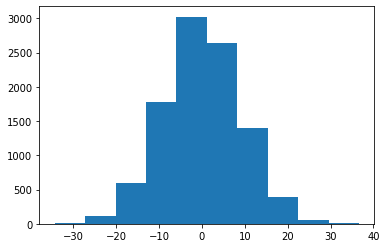

In [16]:
outcomes = monte_carlo_normal_payouts(10000,.00,.02,100)
plt.hist(outcomes)
percent_net_positive = len(list(filter(lambda x: x >0, outcomes)))/len(outcomes)
print(f'{percent_net_positive} of simulations Had a payout greater than 0')
average_outcome = np.average(outcomes)
print(f'average outcome of simulation {average_outcome}')